In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [48]:
dataset, dataset_info = tfds.load('malaria', with_info = True, as_supervised=True, shuffle_files = True, split=['train'])

In [49]:
def splits(dataset, TRAIN_RATIO, VAL_RATIO, TEST_RATIO):

  DATASET_SIZE = len(dataset)
  
  train_dataset = dataset.take(int(TRAIN_RATIO*DATASET_SIZE))
  val_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE)).take(int(VAL_RATIO*DATASET_SIZE))
  test_dataset = dataset.skip(int(TRAIN_RATIO*DATASET_SIZE + VAL_RATIO*DATASET_SIZE)).take(int(TEST_RATIO*DATASET_SIZE))

  return train_dataset, val_dataset,test_dataset

In [50]:
TRAIN_RATIO= 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1

#dataset = tf.data.Dataset.range(10)
train_dataset, val_dataset, test_dataset = splits(dataset[0],TRAIN_RATIO,VAL_RATIO,TEST_RATIO)
print(list(train_dataset.take(1).as_numpy_iterator()),list(val_dataset.take(1).as_numpy_iterator()),list(test_dataset.take(1).as_numpy_iterator()))

[(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8), 1)] [(array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
     

In [5]:
dataset

[<_PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

Dataset Visualization

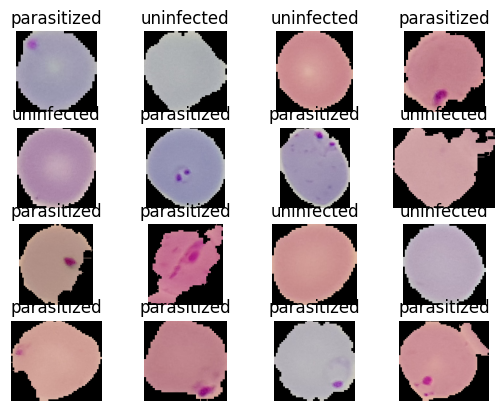

In [6]:
for i, (image,label) in enumerate(train_dataset.take(16)):
  ax= plt.subplot(4,4,i+1)
  plt.imshow(image)
  plt.title(dataset_info.features['label'].int2str(label))
  plt.axis('off')

Data Processing

In [52]:
IM_SIZE = 224
def resize_rescale(image, label):
  return tf.image.resize(image, (IM_SIZE, IM_SIZE))/255.0, label

In [53]:
#MCSHBAP with train_dataset
train_dataset = train_dataset.map(resize_rescale)
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True)
train_dataset = train_dataset.batch(32)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)

In [54]:
#MCSHBAP with val_dataset
val_dataset = val_dataset.map(resize_rescale)
val_dataset = val_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True)
val_dataset = val_dataset.batch(32)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [55]:
#MCSHBAP with test dataset
test_dataset = test_dataset.map(resize_rescale)
test_dataset = test_dataset.batch(32)

In [56]:
for image, label in train_dataset.take(1):
  print(image, label)

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
 

Model Creation

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, InputLayer, BatchNormalization
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, RootMeanSquaredError

In [58]:
model = Sequential([
    InputLayer(input_shape = (IM_SIZE,IM_SIZE, 3)),

    Conv2D(filters = 6, kernel_size =3, strides = 1, padding = 'valid', activation = 'sigmoid' ),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides=2),

    Conv2D(filters = 16, kernel_size =3, strides = 1, padding = 'valid', activation = 'sigmoid' ),
    BatchNormalization(),
    MaxPool2D (pool_size = 2, strides=2),

    Flatten(),

    Dense(100, activation = 'relu'),
    BatchNormalization(),
    Dense(10, activation = 'relu'),
    BatchNormalization(),
    Dense(1, activation = 'sigmoid')


])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 6)       168       
                                                                 
 batch_normalization_4 (Batc  (None, 222, 222, 6)      24        
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 6)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 109, 109, 16)      880       
                                                                 
 batch_normalization_5 (Batc  (None, 109, 109, 16)     64        
 hNormalization)                                                 
                                                      

In [59]:
y_true = [0,1,0,0]
y_pred = [0.6, 0.51,0.94, 1]
bce = BinaryCrossentropy(from_logits=True)
bce(y_true, y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0227046>

In [60]:
model.compile(optimizer = Adam(learning_rate = 0.01),
              loss = BinaryCrossentropy(),
              metrics = ['accuracy']
              )

In [61]:
history = model.fit(train_dataset, validation_data = val_dataset, epochs = 20, verbose = 1)

Epoch 1/20
689/689 [==============================] - 50s 68ms/step - loss: 0.4658 - accuracy: 0.7737 - val_loss: 4.7644 - val_accuracy: 0.5826
Epoch 2/20
689/689 [==============================] - 44s 64ms/step - loss: 0.2024 - accuracy: 0.9327 - val_loss: 0.7330 - val_accuracy: 0.8486
Epoch 3/20
689/689 [==============================] - 45s 66ms/step - loss: 0.1892 - accuracy: 0.9397 - val_loss: 0.7626 - val_accuracy: 0.8878
Epoch 4/20
689/689 [==============================] - 52s 75ms/step - loss: 0.2000 - accuracy: 0.9345 - val_loss: 0.2496 - val_accuracy: 0.9252
Epoch 5/20
689/689 [==============================] - 44s 64ms/step - loss: 0.1741 - accuracy: 0.9445 - val_loss: 0.2912 - val_accuracy: 0.8969
Epoch 6/20
689/689 [==============================] - 45s 65ms/step - loss: 0.1692 - accuracy: 0.9458 - val_loss: 0.2413 - val_accuracy: 0.9027
Epoch 7/20
689/689 [==============================] - 45s 65ms/step - loss: 0.1678 - accuracy: 0.9467 - val_loss: 0.3492 - val_accuracy:

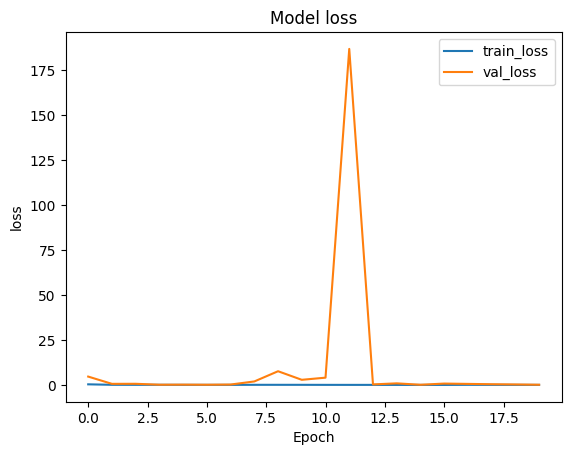

In [68]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

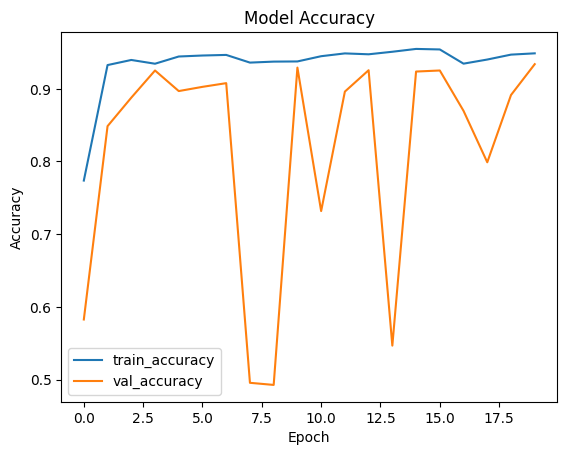

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [70]:
model.evaluate(test_dataset)

87/87 [==============================] - 14s 47ms/step - loss: 0.2606 - accuracy: 0.9303


[0.260617733001709, 0.9303085207939148]

In [71]:
model.predict(test_dataset.take(1))[0][0]

1/1 [==============================] - 12s 12s/step


0.99936444

In [72]:
def parasite_or_not(x):
  if(x<0.5):
    return str('P')
  else:
    return str('U')

1/1 [==============================] - 0s 54ms/step


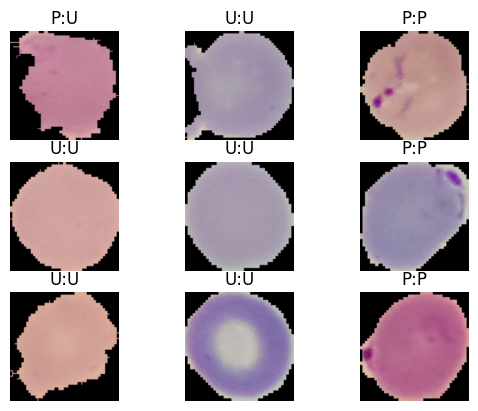

In [73]:
for i, (image, label) in enumerate(test_dataset.take(9)):

  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image[0])
  plt.title(str(parasite_or_not(label.numpy()[0])) + ":" + str(parasite_or_not(model.predict(image)[0][0])))
  
  plt.axis('off')

In [74]:
model.save('malaria_Detection.h5')